In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is 
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
import pandas as pd

batch_size = 512
train_data = np.array(pd.read_csv(r'C:\Users\ryand\Desktop\Data Mining & ML\Fashion\fashion-mnist_train.csv'))
test_data = np.array(pd.read_csv(r'C:\Users\ryand\Desktop\Data Mining & ML\Fashion\fashion-mnist_test.csv'))

X_train = train_data[:, 1:785]
y_train = train_data[:, 0]
X_test = test_data[:, 1:785]
y_test = test_data[:, 0]

In [5]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [7]:
clf = SGDClassifier(random_state=42)

In [8]:
clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [9]:
y_train_pred = clf.predict(X_train)

In [10]:
y_test_pred = clf.predict(X_test)

In [11]:
cross_val_y_train_pred = cross_val_predict(clf, X_train, y_train, cv=10)

# Confusion Matrix'

### Training Set Matrix

In [15]:
confusion_matrix(y_train, y_train_pred)

array([[5567,   51,  138,   60,   67,    4,   60,    1,   52,    0],
       [  25, 5872,   26,   61,   12,    0,    2,    0,    2,    0],
       [ 128,    7, 4620,   17, 1169,    0,   45,    0,   14,    0],
       [ 803,  278,  112, 4323,  428,    4,   39,    0,   13,    0],
       [  65,   30,  389,   53, 5417,    1,   37,    0,    8,    0],
       [   7,    5,   10,    3,    2, 5599,    2,  175,   70,  127],
       [1703,   30, 1109,   68, 1706,    0, 1289,    0,   94,    1],
       [   0,    0,    0,    0,    1,  223,    0, 5531,   20,  225],
       [  60,    4,   83,   18,   63,   38,   32,   17, 5683,    2],
       [   2,    1,    3,    0,    0,  109,    1,  142,    5, 5737]],
      dtype=int64)

Linear classifier SGD doesn't look too great with the training images, and it was fitted with these images. Good amount of true positives by the looks of it though.

In [16]:
train_cnf_matrix = confusion_matrix(y_train, y_train_pred)

In [17]:
train_FP = train_cnf_matrix.sum(axis=0) - np.diag(train_cnf_matrix) 
train_FN = train_cnf_matrix.sum(axis=1) - np.diag(train_cnf_matrix)
train_TP = np.diag(train_cnf_matrix)
train_TN = train_cnf_matrix.sum() - (train_FP + train_FN + train_TP)
train_FP = train_FP.astype(float)
train_FN = train_FN.astype(float)
train_TP = train_TP.astype(float)
train_TN = train_TN.astype(float)

avg_train_FP=0
avg_train_FN=0
avg_train_TP=0
avg_train_TN=0

for i in train_FP:
    avg_train_FP+=i
    
for i in train_FN:
    avg_train_FN+=i
    
for i in train_TP:
    avg_train_TP+=i

for i in train_TN:
    avg_train_TN+=i
    
avg_train_FP = avg_train_FP/10
avg_train_FN = avg_train_FN/10
avg_train_TP = avg_train_TP/10
avg_train_TN = avg_train_TN/10

### Cross-validation Matrix

In [12]:
confusion_matrix(y_train, cross_val_y_train_pred)

array([[4378,   56,  264,  363,   96,    8,  682,    2,  145,    6],
       [  22, 5743,   39,  131,   28,    0,   21,    1,   11,    4],
       [  80,   17, 4292,   55, 1047,    0,  415,    2,   92,    0],
       [ 250,  116,  138, 4992,  267,    3,  165,    4,   51,   14],
       [  14,   20,  901,  270, 4060,    1,  684,    0,   50,    0],
       [   6,   11,   19,    2,    3, 5152,   29,  361,  133,  284],
       [ 791,   27,  997,  290,  989,    0, 2674,    1,  229,    2],
       [   0,    0,    0,    0,    1,  181,    9, 5457,   26,  326],
       [  39,    7,   75,   41,   46,   34,  105,   35, 5609,    9],
       [   0,    3,    3,    0,    0,   94,    6,  292,   16, 5586]],
      dtype=int64)

Like without cv, class 6 is not being predicted well. We can see that class 6 and 4 are the worst predicted | class 6 is shirts, class 4 is coats, very similar items of clothing, and this is partly why the classifier will struggle.

In [13]:
cv_cnf_matrix = confusion_matrix(y_train, cross_val_y_train_pred)

In [14]:
CV_FP = cv_cnf_matrix.sum(axis=0) - np.diag(cv_cnf_matrix) 
CV_FN = cv_cnf_matrix.sum(axis=1) - np.diag(cv_cnf_matrix)
CV_TP = np.diag(cv_cnf_matrix)
CV_TN = cv_cnf_matrix.sum() - (CV_FP + CV_FN + CV_TP)
CV_FP = CV_FP.astype(float)
CV_FN = CV_FN.astype(float)
CV_TP = CV_TP.astype(float)
CV_TN = CV_TN.astype(float)

avg_cv_FP=0
avg_cv_FN=0
avg_cv_TP=0
avg_cv_TN=0

for i in CV_FP:
    avg_cv_FP+=i
    
for i in CV_FN:
    avg_cv_FN+=i
    
for i in CV_TP:
    avg_cv_TP+=i

for i in CV_TN:
    avg_cv_TN+=i
    
avg_cv_FP = avg_cv_FP/10
avg_cv_FN = avg_cv_FN/10
avg_cv_TP = avg_cv_TP/10
avg_cv_TN = avg_cv_TN/10

### Test Set Matrix

In [19]:
cfm = confusion_matrix(y_test, y_test_pred)
confusion_matrix(y_test, y_test_pred)

array([[902,  13,  35,  11,   8,   2,  13,   0,  16,   0],
       [  6, 978,   6,   5,   1,   0,   3,   1,   0,   0],
       [ 24,   5, 755,   4, 195,   0,  12,   0,   5,   0],
       [130,  53,  22, 724,  62,   0,   4,   1,   4,   0],
       [ 10,   3,  69,  10, 899,   1,   7,   0,   1,   0],
       [  5,   4,   2,   1,   1, 883,   1,  51,  14,  38],
       [292,  10, 172,  17, 281,   0, 213,   0,  15,   0],
       [  0,   0,   0,   0,   0,  43,   0, 892,   2,  63],
       [ 13,   1,  19,   6,   7,  11,  11,   6, 926,   0],
       [  1,   0,   2,   0,   1,  24,   0,  31,   2, 939]], dtype=int64)

Okay on the test set, struggling with class 6 again. 0, 2, and 4 are tshirt, pullover, and coat | similar items and the ability to differentiate between them here is clearly not so great.

In [20]:
test_cnf_matrix = confusion_matrix(y_test, y_test_pred)

In [21]:
test_FP = test_cnf_matrix.sum(axis=0) - np.diag(test_cnf_matrix) 
test_FN = test_cnf_matrix.sum(axis=1) - np.diag(test_cnf_matrix)
test_TP = np.diag(test_cnf_matrix)
test_TN = test_cnf_matrix.sum() - (test_FP + test_FN + test_TP)
test_FP = test_FP.astype(float)
test_FN = test_FN.astype(float)
test_TP = test_TP.astype(float)
test_TN = test_TN.astype(float)

avg_test_FP=0
avg_test_FN=0
avg_test_TP=0
avg_test_TN=0

for i in test_FP:
    avg_test_FP+=i
    
for i in test_FN:
    avg_test_FN+=i
    
for i in test_TP:
    avg_test_TP+=i

for i in test_TN:
    avg_test_TN+=i
    
avg_test_FP = avg_test_FP/10
avg_test_FN = avg_test_FN/10
avg_test_TP = avg_test_TP/10
avg_test_TN = avg_test_TN/10

# Accuracy

Accuracy is highest on the training set, and this shows slightly that the classifier has learnt the training data a little too much, and so it is overfitting slightly, and therefore based off of these accuracies, it doesnt generalize superbly, but it also doesnt generalize really poorly, it just generalizes okay to the new data.

### SGD Train

In [18]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_train, y_train_pred))

print(accuracy_score(y_train, y_train_pred, normalize=False))

accuracy = accuracy_score(y_train, y_train_pred)


0.8273
49638


### SGD Cross-validation

In [22]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_train, cross_val_y_train_pred))

print(accuracy_score(y_train, cross_val_y_train_pred, normalize=False))

accuracy = accuracy_score(y_train, cross_val_y_train_pred)

0.79905
47943


### SGD Test

In [23]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_test_pred))

print(accuracy_score(y_test, y_test_pred, normalize=False))

accuracy = accuracy_score(y_test, y_test_pred)

0.8111
8111


## Specificity

TN / (TN + FP) How sensitive is the classifier to the negative cases? - A highly specific test for cancer: if "YES" then you can be sure it's "YES". Closer to 1 means less false positives. 100% Specificity misses some true positives but in return provides no false positives.

### SGD Train

In [24]:
avg_train_TN/(avg_train_TN+avg_train_FP)

0.9808111111111112

### SGD Cross-validation

In [25]:
avg_cv_TN/(avg_cv_TN+avg_cv_FP)

0.9776722222222223

### SGD Test

In [26]:
avg_test_TN/(avg_test_TN+avg_test_FP)

0.9790111111111112

# Precision and Recall
Recall is intuitevely the ability of the classifier to find all the positive samples.

The best value is 1, and the worst value is 0.

### precision = TP / (TP+FP)

### SGD Train Precision

In [28]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train, y_train_pred, average='micro')

0.8273

### SGD Cross-validation Precision

In [27]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train, cross_val_y_train_pred, average='micro')

0.79905

### SGD Test Precision

In [29]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, y_test_pred, average='micro')

0.8111

### recall = TP / (TP+FN)
Similar to sensitivity (how sensitive is our classifier to the true cases? closer to 1 when theres no false negatives) with 100% sensitivity you catch all cases that could be true, so there will be more false postitives

### SGD Train Recall

In [ ]:
recall_score(y_train, y_train_pred, average='micro')

### SGD Cross-validation Recall

In [31]:
recall_score(y_train, cross_val_y_train_pred, average='micro')

0.79905

### SGD Test Recall

In [33]:
recall_score(y_test, y_test_pred, average='micro')

0.8111

# F1 Scores

F1 = 2 / ((1 / precision) + (1 / recall)) = 2 x ((precision x recall) / (precision + recall)) = TP / (TP + ((FN + FP) / 2))

### SGD Train F1 Score

In [37]:
from sklearn.metrics import f1_score

f1_score(y_train, y_train_pred, average='micro')

0.8273

### SGD Cross-validation F1 Score

In [34]:
from sklearn.metrics import f1_score

f1_score(y_train, cross_val_y_train_pred, average='micro')

0.7990500000000001

### SGD Test F1 Score

In [35]:
from sklearn.metrics import f1_score

f1_score(y_test, y_test_pred, average='micro')

0.8111

# How well does the SGD classifier generalize to new data?

Accuracy is highest on the training set, and this shows slightly that the classifier has learnt the training data a little too much, and so it is overfitting slightly, and therefore based off of the accuracies of train, test, and cv, it doesnt generalize superbly, but it also doesnt generalize really poorly, it just generalizes okay to the new data.

# What hypothesis can be made about this data set being linearly separable or not?

The linear classifier struggled with classes 0, 2, 4, and 6 because they are tshirt, pullover, coat, and shirt. These are similar items and the ability to differentiate between them here is clearly not so great, and therefore I would hypothesise that it is difficult for the classifier to seperate the classes - there is not clear differences like there is between say a shoe and a tshirt, or a plane and a house. If this dataset was lineraly seperable, we would see much better accuracy using the SGD classifier.

# Multilayer Perceptron

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Multilayer Perceptron | X_train

## Standard Configuration | Relu activation function

An activation function takes the summed weighted input from the node, and turns it into the activation of the node/output for that input.

Relu activation function is the rectified linear activation function, which outputs the input direcetly if it is postivie, and otherwise outputs zero.

In [32]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
y_pred = clf.predict(X_train)

In [33]:
confusion_matrix(y_train, y_pred)

array([[5301,   19,   69,  115,    8,    0,  464,    0,   24,    0],
       [  16, 5921,    3,   34,    2,    0,   12,    0,   12,    0],
       [  60,   43, 4994,   54,  462,    0,  372,    0,   15,    0],
       [ 133,   78,   31, 5594,   53,    0,   91,    0,   20,    0],
       [   7,   18,  579,  443, 4685,    0,  221,    0,   47,    0],
       [   0,    0,    0,    0,    0, 5985,    0,    9,    5,    1],
       [1085,    2,  755,  122,  458,    0, 3529,    0,   49,    0],
       [   1,    0,    0,    0,    0,   14,    7, 5925,    5,   48],
       [   5,    2,    4,   11,    6,    0,   79,    3, 5890,    0],
       [   0,    0,    0,    0,    0,   63,    2,  243,    2, 5690]],
      dtype=int64)

In [34]:
cnf_matrix = confusion_matrix(y_train, y_pred)

In [35]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

avg_FP=0
avg_FN=0
avg_TP=0
avg_TN=0

for i in FP:
    avg_FP+=i
    
for i in FN:
    avg_FN+=i
    
for i in TP:
    avg_TP+=i

for i in TN:
    avg_TN+=i
    
avg_FP = avg_FP/10
avg_FN = avg_FN/10
avg_TP = avg_TP/10
avg_TN = avg_TN/10

## Accuracy

In [36]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_train, y_pred))

print(accuracy_score(y_train, y_pred, normalize=False))

accuracy = accuracy_score(y_train, y_pred)

0.8919
53514


89% accuracy on the training set

## Specificity

In [37]:
avg_TN/(avg_TN+avg_FP)

0.9879888888888889

## Precision and Recall

### precision = TP / (TP+FP)

In [38]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train, y_pred, average='micro')

0.8919

### Recall

In [39]:
recall_score(y_train, y_pred, average='micro')

0.8919

## F1 Score

In [40]:
from sklearn.metrics import f1_score

f1_score(y_train, y_pred, average='micro')

0.8919

# Multilayer Perceptron | X_test

## Standard Configuration

In [13]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [19]:
confusion_matrix(y_test, y_pred)

array([[857,   5,  13,  20,   2,   3,  91,   0,   9,   0],
       [  6, 979,   3,   8,   1,   0,   2,   0,   1,   0],
       [ 11,  16, 798,  15,  78,   0,  77,   0,   5,   0],
       [ 39,  34,  11, 878,   7,   0,  24,   0,   7,   0],
       [  2,   4, 100,  63, 767,   0,  43,   0,  21,   0],
       [  1,   0,   0,   1,   0, 943,   0,  33,   6,  16],
       [207,   8, 133,  26,  76,   0, 537,   0,  13,   0],
       [  0,   0,   0,   0,   0,  24,   0, 945,   3,  28],
       [  6,   1,   2,   2,   5,   1,  23,   5, 955,   0],
       [  0,   0,   0,   0,   0,  18,   2,  57,   4, 919]], dtype=int64)

In [23]:
cnf_matrix = confusion_matrix(y_test, y_pred)

In [25]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

avg_FP=0
avg_FN=0
avg_TP=0
avg_TN=0

for i in FP:
    avg_FP+=i
    
for i in FN:
    avg_FN+=i
    
for i in TP:
    avg_TP+=i

for i in TN:
    avg_TN+=i
    
avg_FP = avg_FP/10
avg_FN = avg_FN/10
avg_TP = avg_TP/10
avg_TN = avg_TN/10

## Accuracy

In [26]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

print(accuracy_score(y_test, y_pred, normalize=False))

accuracy = accuracy_score(y_test, y_pred)

0.8578
8578


drop from 89% accuracy on training set to 86% accuracy with test set. Slight overfitting and okay generalization, 90%+ would be the minimum for good generalization.

## Specificity

In [27]:
avg_TN/(avg_TN+avg_FP)

0.9842

Higher value of true negatives with lower false positives overall.

## Precision and Recall

### precision = TP / (TP+FP)

In [29]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, y_pred, average='micro')

0.8578

### Recall

In [30]:
recall_score(y_test, y_pred, average='micro')

0.8578

## F1 Score

In [31]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average='micro')

0.8578

# Multilayer Perceptron | X_train

## Activiation function = Identity

returns f(x) = x, so output data is proportional to input data.

In [41]:
clf = MLPClassifier(random_state=1, max_iter=300, activation='identity').fit(X_train, y_train)
y_pred = clf.predict(X_train)

In [42]:
confusion_matrix(y_train, y_pred)

array([[4708,   15,   13,  296,   68,    2,  830,    1,   66,    1],
       [   5, 5807,    2,  129,   26,    0,   28,    0,    3,    0],
       [ 143,   15, 1139,   45, 2149,    0, 2455,    1,   53,    0],
       [ 123,   37,    6, 5221,  310,    1,  279,    0,   23,    0],
       [   9,   12,   14,   98, 5294,    0,  563,    0,   10,    0],
       [   0,    2,    0,    0,    1, 5512,    2,  331,   49,  103],
       [ 612,   15,   55,  143,  754,    0, 4316,    0,  105,    0],
       [   0,    0,    0,    0,    0,   90,    0, 5659,   16,  235],
       [   7,    9,    7,   42,   79,    1,  135,    3, 5717,    0],
       [   0,    0,    0,    0,    0,   39,    0,  150,    2, 5809]],
      dtype=int64)

In [43]:
cnf_matrix = confusion_matrix(y_train, y_pred)

In [44]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

avg_FP=0
avg_FN=0
avg_TP=0
avg_TN=0

for i in FP:
    avg_FP+=i
    
for i in FN:
    avg_FN+=i
    
for i in TP:
    avg_TP+=i

for i in TN:
    avg_TN+=i
    
avg_FP = avg_FP/10
avg_FN = avg_FN/10
avg_TP = avg_TP/10
avg_TN = avg_TN/10

## Accuracy

In [45]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_train, y_pred))

print(accuracy_score(y_train, y_pred, normalize=False))

accuracy = accuracy_score(y_train, y_pred)

0.8197
49182


Had 89% accuracy with the standard configuration using activation function relu. Here, only 82% accuracy.

## Specificity

In [46]:
avg_TN/(avg_TN+avg_FP)

0.9799666666666667

## Precision and Recall

### precision = TP / (TP+FP)

In [47]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train, y_pred, average='micro')

0.8197

### Recall

In [48]:
recall_score(y_train, y_pred, average='micro')

0.8197

## F1 Score

In [49]:
from sklearn.metrics import f1_score

f1_score(y_train, y_pred, average='micro')

0.8197

# Multilayer Perceptron | X_test

## Activiation function = Identity

In [50]:
clf = MLPClassifier(random_state=1, max_iter=300, activation='identity').fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [51]:
confusion_matrix(y_test, y_pred)

array([[759,   4,   3,  56,   9,   1, 152,   0,  16,   0],
       [  1, 973,   0,  17,   1,   1,   7,   0,   0,   0],
       [ 28,   3, 175,   7, 353,   0, 421,   0,  13,   0],
       [ 24,  15,   1, 845,  60,   1,  49,   2,   3,   0],
       [  1,   1,   4,  14, 874,   2,  99,   0,   5,   0],
       [  2,   3,   0,   1,   1, 856,   0,  77,  23,  37],
       [118,   6,  12,  35, 132,   0, 673,   0,  24,   0],
       [  0,   0,   0,   0,   0,  20,   0, 912,   4,  64],
       [  6,   2,   0,  15,  13,   6,  29,   3, 925,   1],
       [  0,   0,   0,   0,   0,   9,   0,  36,   1, 954]], dtype=int64)

In [52]:
cnf_matrix = confusion_matrix(y_test, y_pred)

In [53]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

avg_FP=0
avg_FN=0
avg_TP=0
avg_TN=0

for i in FP:
    avg_FP+=i
    
for i in FN:
    avg_FN+=i
    
for i in TP:
    avg_TP+=i

for i in TN:
    avg_TN+=i
    
avg_FP = avg_FP/10
avg_FN = avg_FN/10
avg_TP = avg_TP/10
avg_TN = avg_TN/10

## Accuracy

In [54]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

print(accuracy_score(y_test, y_pred, normalize=False))

accuracy = accuracy_score(y_test, y_pred)

0.7946
7946


Same again, lower accuracy compared to that of standard config.

## Specificity

In [55]:
avg_TN/(avg_TN+avg_FP)

0.9771777777777778

## Precision and Recall

### precision = TP / (TP+FP)

In [56]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, y_pred, average='micro')

0.7946

### Recall

In [57]:
recall_score(y_test, y_pred, average='micro')

0.7946

## F1 Score

In [58]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average='micro')

0.7946000000000001

# Multilayer Perceptron | X_train

## Activiation function = logistic

Input to this activation function is transformed into a float, between 0.0 and 1.0.

In [60]:
clf = MLPClassifier(random_state=1, max_iter=300, activation='logistic').fit(X_train, y_train)
y_pred = clf.predict(X_train)

In [61]:
confusion_matrix(y_train, y_pred)

array([[5122,   44,  108,  198,   21,    2,  421,    0,   81,    3],
       [  41, 5710,   79,  141,   14,    0,   11,    0,    4,    0],
       [  93,    8, 3999,   61, 1348,    0,  460,    0,   31,    0],
       [ 357,   98,  114, 5104,  221,    1,   88,    0,   17,    0],
       [  14,   22,  450,  377, 4587,    0,  517,    0,   33,    0],
       [   2,    0,    0,    6,    2, 5382,    0,  382,   20,  206],
       [1299,   24,  723,  144,  646,    0, 3049,    1,  113,    1],
       [   0,    0,    0,    0,    0,  188,    0, 5588,    8,  216],
       [  27,    5,   34,   31,   30,   22,  117,   37, 5695,    2],
       [   2,    0,    2,    0,    0,  139,    2,  519,    2, 5334]],
      dtype=int64)

In [62]:
cnf_matrix = confusion_matrix(y_train, y_pred)

In [63]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

avg_FP=0
avg_FN=0
avg_TP=0
avg_TN=0

for i in FP:
    avg_FP+=i
    
for i in FN:
    avg_FN+=i
    
for i in TP:
    avg_TP+=i

for i in TN:
    avg_TN+=i
    
avg_FP = avg_FP/10
avg_FN = avg_FN/10
avg_TP = avg_TP/10
avg_TN = avg_TN/10

## Accuracy

In [64]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_train, y_pred))

print(accuracy_score(y_train, y_pred, normalize=False))

accuracy = accuracy_score(y_train, y_pred)

0.8261666666666667
49570


83% accuracy is lower accuracy than the original config of 89%, but higher than identity activation function which had 82% accuracy.

## Specificity

In [65]:
avg_TN/(avg_TN+avg_FP)

0.9806851851851852

## Precision and Recall

### precision = TP / (TP+FP)

In [66]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train, y_pred, average='micro')

0.8261666666666667

### Recall

In [67]:
recall_score(y_train, y_pred, average='micro')

0.8261666666666667

## F1 Score

In [68]:
from sklearn.metrics import f1_score

f1_score(y_train, y_pred, average='micro')

0.8261666666666666

# Multilayer Perceptron | X_test

## Activiation function = Logistic

In [69]:
clf = MLPClassifier(random_state=1, max_iter=300, activation='logistic').fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [70]:
confusion_matrix(y_test, y_pred)

array([[860,  12,  16,  22,   7,   0,  66,   0,  17,   0],
       [  6, 950,  18,  20,   4,   1,   1,   0,   0,   0],
       [ 21,   0, 679,  11, 210,   0,  67,   0,  12,   0],
       [ 58,  29,  15, 850,  31,   0,  14,   0,   3,   0],
       [  0,   3,  62,  50, 801,   0,  77,   0,   7,   0],
       [  0,   0,   0,   1,   0, 863,   0,  75,   7,  54],
       [227,  13, 114,  21,  96,   0, 512,   0,  17,   0],
       [  0,   0,   0,   0,   0,  41,   0, 919,   0,  40],
       [  5,   0,   7,   3,   1,   3,  17,   5, 958,   1],
       [  0,   0,   0,   0,   0,  15,   0,  98,   1, 886]], dtype=int64)

In [71]:
cnf_matrix = confusion_matrix(y_test, y_pred)

In [72]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

avg_FP=0
avg_FN=0
avg_TP=0
avg_TN=0

for i in FP:
    avg_FP+=i
    
for i in FN:
    avg_FN+=i
    
for i in TP:
    avg_TP+=i

for i in TN:
    avg_TN+=i
    
avg_FP = avg_FP/10
avg_FN = avg_FN/10
avg_TP = avg_TP/10
avg_TN = avg_TN/10

## Accuracy

In [73]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

print(accuracy_score(y_test, y_pred, normalize=False))

accuracy = accuracy_score(y_test, y_pred)

0.8278
8278


83% is lower than original config again of 86% with the test set, identity function accuracy for test set was 79% so an improvement in comparison there.

## Specificity

In [74]:
avg_TN/(avg_TN+avg_FP)

0.9808666666666666

## Precision and Recall

### precision = TP / (TP+FP)

In [75]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, y_pred, average='micro')

0.8278

### Recall

In [76]:
recall_score(y_test, y_pred, average='micro')

0.8278

## F1 Score

In [77]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average='micro')

0.8278

# Multilayer Perceptron | X_train

## Activiation function = tanh

Takes any real value as input and outputs a value in the range of -1 to 1.

In [78]:
clf = MLPClassifier(random_state=1, max_iter=300, activation='tanh').fit(X_train, y_train)
y_pred = clf.predict(X_train)

In [79]:
confusion_matrix(y_train, y_pred)

array([[4530,   46,   58,  682,   10,    2,  632,    0,   40,    0],
       [  17, 5720,   35,  134,    2,    0,   90,    0,    2,    0],
       [  25,   11, 4609,   54,  701,    0,  578,    0,   22,    0],
       [ 140,  187,  155, 5085,  274,    0,  149,    0,   10,    0],
       [  13,   64, 1215,  213, 3996,    0,  481,    0,   18,    0],
       [   4,    0,    2,    6,    1, 5333,    4,  256,   41,  353],
       [ 993,   20,  830,  454,  725,    2, 2895,    0,   81,    0],
       [   0,    0,    0,    0,    0,  277,    0, 5211,    8,  504],
       [  15,    6,   67,   36,   47,   20,  262,   25, 5515,    7],
       [   2,    0,    1,    1,    0,  183,    6,  245,    5, 5557]],
      dtype=int64)

In [80]:
cnf_matrix = confusion_matrix(y_train, y_pred)

In [81]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

avg_FP=0
avg_FN=0
avg_TP=0
avg_TN=0

for i in FP:
    avg_FP+=i
    
for i in FN:
    avg_FN+=i
    
for i in TP:
    avg_TP+=i

for i in TN:
    avg_TN+=i
    
avg_FP = avg_FP/10
avg_FN = avg_FN/10
avg_TP = avg_TP/10
avg_TN = avg_TN/10

## Accuracy

In [82]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_train, y_pred))

print(accuracy_score(y_train, y_pred, normalize=False))

accuracy = accuracy_score(y_train, y_pred)

0.8075166666666667
48451


tanh activation function returns 81% accuracy, so the worst out of all of them. Logistic had 83% accuracy, original config of 89%, identity activation function had 82% accuracy.

## Specificity

In [83]:
avg_TN/(avg_TN+avg_FP)

0.978612962962963

## Precision and Recall

### precision = TP / (TP+FP)

In [84]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train, y_pred, average='micro')

0.8075166666666667

### Recall

In [85]:
recall_score(y_train, y_pred, average='micro')

0.8075166666666667

## F1 Score

In [86]:
from sklearn.metrics import f1_score

f1_score(y_train, y_pred, average='micro')

0.8075166666666667

# Multilayer Perceptron | X_test

## Activiation function = tanh

In [87]:
clf = MLPClassifier(random_state=1, max_iter=300, activation='tanh').fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [88]:
confusion_matrix(y_test, y_pred)

array([[741,   8,  15, 121,   2,   1, 103,   0,   9,   0],
       [  0, 954,   7,  18,   0,   0,  21,   0,   0,   0],
       [  5,   1, 768,  13, 121,   0,  84,   0,   8,   0],
       [ 19,  42,  28, 856,  35,   0,  19,   0,   1,   0],
       [  3,  11, 196,  32, 672,   0,  82,   0,   4,   0],
       [  2,   0,   1,   1,   1, 865,   0,  52,  10,  68],
       [169,   4, 118,  88, 115,   0, 491,   0,  15,   0],
       [  0,   0,   0,   0,   0,  38,   0, 849,   0, 113],
       [  2,   0,  21,   2,   6,   4,  41,   3, 919,   2],
       [  0,   0,   0,   0,   0,  34,   1,  54,   1, 910]], dtype=int64)

In [89]:
cnf_matrix = confusion_matrix(y_test, y_pred)

In [90]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

avg_FP=0
avg_FN=0
avg_TP=0
avg_TN=0

for i in FP:
    avg_FP+=i
    
for i in FN:
    avg_FN+=i
    
for i in TP:
    avg_TP+=i

for i in TN:
    avg_TN+=i
    
avg_FP = avg_FP/10
avg_FN = avg_FN/10
avg_TP = avg_TP/10
avg_TN = avg_TN/10

## Accuracy

In [91]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

print(accuracy_score(y_test, y_pred, normalize=False))

accuracy = accuracy_score(y_test, y_pred)

0.8025
8025


tanh has 80% accuracy on the test set, slightly better than the identity function but still way behind the other two. logistic had 83%, original config 86%, identity function accuracy for test set was 79%.

## Specificity

In [92]:
avg_TN/(avg_TN+avg_FP)

0.9780555555555556

## Precision and Recall

### precision = TP / (TP+FP)

In [93]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, y_pred, average='micro')

0.8025

### Recall

In [94]:
recall_score(y_test, y_pred, average='micro')

0.8025

## F1 Score

In [95]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average='micro')

0.8025

# Multilayer Perceptron | X_train

## Number and Size of Layers

## Default = 1 hidden layer of 100 units

### 3 hidden layers with 200 hidden units each

In [96]:
clf = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes=(200,200,200)).fit(X_train, y_train)
y_pred = clf.predict(X_train)

In [97]:
confusion_matrix(y_train, y_pred)

array([[5759,    2,   19,   33,    2,    0,  180,    0,    5,    0],
       [   0, 5992,    1,    6,    0,    0,    0,    0,    1,    0],
       [  20,    1, 5717,   20,  179,    0,   62,    0,    1,    0],
       [  24,    2,    4, 5893,   54,    0,   20,    0,    3,    0],
       [   3,    0,  334,   78, 5488,    0,   95,    0,    2,    0],
       [   0,    0,    0,    0,    0, 5996,    0,    1,    0,    3],
       [ 293,    0,  233,   41,  113,    0, 5311,    0,    9,    0],
       [   0,    0,    0,    0,    0,    1,    0, 5974,    0,   25],
       [   0,    1,    3,    0,    0,    3,    6,    7, 5980,    0],
       [   0,    0,    0,    0,    0,    1,    0,   17,    0, 5982]],
      dtype=int64)

5996 TP / 6000 TP for class 5!

In [98]:
cnf_matrix = confusion_matrix(y_train, y_pred)

In [99]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

avg_FP=0
avg_FN=0
avg_TP=0
avg_TN=0

for i in FP:
    avg_FP+=i
    
for i in FN:
    avg_FN+=i
    
for i in TP:
    avg_TP+=i

for i in TN:
    avg_TN+=i
    
avg_FP = avg_FP/10
avg_FN = avg_FN/10
avg_TP = avg_TP/10
avg_TN = avg_TN/10

## Accuracy

In [100]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_train, y_pred))

print(accuracy_score(y_train, y_pred, normalize=False))

accuracy = accuracy_score(y_train, y_pred)

0.9682
58092


97% accuracy, seems great so far. Original config had 89%

## Specificity

In [101]:
avg_TN/(avg_TN+avg_FP)

0.9964666666666666

Super low amount of fps

## Precision and Recall

### precision = TP / (TP+FP)

In [102]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train, y_pred, average='micro')

0.9682

### Recall

In [103]:
recall_score(y_train, y_pred, average='micro')

0.9682

## F1 Score

In [104]:
from sklearn.metrics import f1_score

f1_score(y_train, y_pred, average='micro')

0.9682

# Multilayer Perceptron | X_test

## Number and Size of Layers

### 3 hidden layers with 200 hidden units each

In [106]:
clf = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes=(200,200,200)).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [107]:
confusion_matrix(y_test, y_pred)

array([[848,   2,  25,  18,   1,   1,  97,   0,   8,   0],
       [  3, 983,   0,  11,   0,   0,   2,   0,   1,   0],
       [ 18,   1, 840,  12,  71,   0,  52,   0,   6,   0],
       [ 20,  12,  11, 911,  22,   0,  18,   1,   5,   0],
       [  2,   0,  96,  28, 823,   0,  48,   0,   3,   0],
       [  0,   0,   1,   0,   0, 955,   0,  25,   0,  19],
       [137,   2,  89,  26,  57,   0, 673,   0,  16,   0],
       [  0,   0,   0,   0,   1,  12,   0, 951,   0,  36],
       [  3,   1,   3,   4,   2,   6,   7,   8, 965,   1],
       [  0,   0,   0,   0,   0,   3,   0,  37,   0, 960]], dtype=int64)

In [108]:
cnf_matrix = confusion_matrix(y_test, y_pred)

In [109]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

avg_FP=0
avg_FN=0
avg_TP=0
avg_TN=0

for i in FP:
    avg_FP+=i
    
for i in FN:
    avg_FN+=i
    
for i in TP:
    avg_TP+=i

for i in TN:
    avg_TN+=i
    
avg_FP = avg_FP/10
avg_FN = avg_FN/10
avg_TP = avg_TP/10
avg_TN = avg_TN/10

## Accuracy

In [110]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

print(accuracy_score(y_test, y_pred, normalize=False))

accuracy = accuracy_score(y_test, y_pred)

0.8909
8909


86% accuracy on the original config for x_test, here it got 89%, an improvement in generalization too.

## Specificity

In [111]:
avg_TN/(avg_TN+avg_FP)

0.9878777777777777

## Precision and Recall

### precision = TP / (TP+FP)

In [112]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, y_pred, average='micro')

0.8909

### Recall

In [113]:
recall_score(y_test, y_pred, average='micro')

0.8909

## F1 Score

In [114]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average='micro')

0.8909

# Multilayer Perceptron | X_train

## Number and Size of Layers

### 5 hidden layers with 5 hidden units each

In [115]:
clf = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes=(5,5,5,5,5)).fit(X_train, y_train)
y_pred = clf.predict(X_train)

In [116]:
confusion_matrix(y_train, y_pred)

array([[4693,    7,   66,  480,   58,    1,  650,    0,   45,    0],
       [   0, 5749,   33,  170,   37,    0,   11,    0,    0,    0],
       [  62,    9, 5191,   64,  314,    0,  353,    0,    7,    0],
       [ 166,   73,   71, 5285,  171,    0,  234,    0,    0,    0],
       [   8,   24, 4015,  234,  767,    0,  937,    0,   15,    0],
       [   0,   12,    0,    1,    2, 5648,   10,  168,   11,  148],
       [1177,    7, 1037,  203,  299,    0, 3159,    0,  117,    1],
       [   0,    0,    0,    1,    0,   68,    3, 5741,    3,  184],
       [  31,    0,   44,   15,   17,   43,  298,   11, 5538,    3],
       [   0,    1,    0,    0,    1,   26,    0,  123,    0, 5849]],
      dtype=int64)

In [117]:
cnf_matrix = confusion_matrix(y_train, y_pred)

In [118]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

avg_FP=0
avg_FN=0
avg_TP=0
avg_TN=0

for i in FP:
    avg_FP+=i
    
for i in FN:
    avg_FN+=i
    
for i in TP:
    avg_TP+=i

for i in TN:
    avg_TN+=i
    
avg_FP = avg_FP/10
avg_FN = avg_FN/10
avg_TP = avg_TP/10
avg_TN = avg_TN/10

## Accuracy

In [119]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_train, y_pred))

print(accuracy_score(y_train, y_pred, normalize=False))

accuracy = accuracy_score(y_train, y_pred)

0.7936666666666666
47620


79% clearly way worse than others. Less hidden units is not benefitial.

## Specificity

In [120]:
avg_TN/(avg_TN+avg_FP)

0.9770740740740741

## Precision and Recall

### precision = TP / (TP+FP)

In [121]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train, y_pred, average='micro')

0.7936666666666666

### Recall

In [122]:
recall_score(y_train, y_pred, average='micro')

0.7936666666666666

## F1 Score

In [123]:
from sklearn.metrics import f1_score

f1_score(y_train, y_pred, average='micro')

0.7936666666666666

# Multilayer Perceptron | X_test

## Number and Size of Layers

### 5 hidden layers with 5 hidden units each

In [133]:
clf = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes=(5,5,5,5,5)).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [134]:
confusion_matrix(y_test, y_pred)

array([[778,   0,  13,  81,  15,   1,  98,   1,  13,   0],
       [  0, 959,   5,  26,   7,   0,   3,   0,   0,   0],
       [ 16,   2, 854,  10,  53,   0,  63,   0,   2,   0],
       [ 25,  18,  17, 867,  26,   0,  47,   0,   0,   0],
       [  1,   7, 691,  27, 106,   0, 162,   0,   6,   0],
       [  0,   1,   3,   0,   1, 879,   5,  57,  10,  44],
       [199,   5, 150,  48,  74,   0, 501,   0,  23,   0],
       [  0,   0,   0,   0,   0,  36,   0, 906,   1,  57],
       [  3,   0,  13,   1,   6,  14,  62,   2, 897,   2],
       [  0,   0,   0,   0,   0,  10,   0,  36,   0, 954]], dtype=int64)

In [135]:
cnf_matrix = confusion_matrix(y_test, y_pred)

In [136]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

avg_FP=0
avg_FN=0
avg_TP=0
avg_TN=0

for i in FP:
    avg_FP+=i
    
for i in FN:
    avg_FN+=i
    
for i in TP:
    avg_TP+=i

for i in TN:
    avg_TN+=i
    
avg_FP = avg_FP/10
avg_FN = avg_FN/10
avg_TP = avg_TP/10
avg_TN = avg_TN/10

## Accuracy

In [137]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

print(accuracy_score(y_test, y_pred, normalize=False))

accuracy = accuracy_score(y_test, y_pred)

0.7701
7701


77% is very poor.

## Specificity

In [138]:
avg_TN/(avg_TN+avg_FP)

0.9744555555555556

## Precision and Recall

### precision = TP / (TP+FP)

In [139]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, y_pred, average='micro')

0.7701

### Recall

In [140]:
recall_score(y_test, y_pred, average='micro')

0.7701

## F1 Score

In [141]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average='micro')

0.7701

# Multilayer Perceptron | X_train

## Number and Size of Layers

### 1 hidden layer with 400 hidden units

In [151]:
clf = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes=(400)).fit(X_train, y_train)
y_pred = clf.predict(X_train)

In [152]:
confusion_matrix(y_train, y_pred)

array([[5253,   19,   45,   89,   10,    0,  575,    1,    8,    0],
       [   8, 5973,    0,    9,    0,    0,    9,    0,    1,    0],
       [  71,    1, 5058,   28,  500,    0,  334,    0,    8,    0],
       [  37,   47,   19, 5635,  149,    0,  110,    0,    2,    1],
       [   1,    1,  327,  140, 5233,    0,  298,    0,    0,    0],
       [   0,    0,    1,    0,    0, 5989,    0,    0,    5,    5],
       [ 531,    7,  339,   57,  248,    0, 4815,    0,    3,    0],
       [   0,    0,    0,    0,    0,   11,    0, 5778,    2,  209],
       [   2,    0,    2,    5,    4,    0,   86,    1, 5900,    0],
       [   0,    0,    0,    0,    0,    1,    0,   58,    1, 5940]],
      dtype=int64)

In [153]:
cnf_matrix = confusion_matrix(y_train, y_pred)

In [154]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

avg_FP=0
avg_FN=0
avg_TP=0
avg_TN=0

for i in FP:
    avg_FP+=i
    
for i in FN:
    avg_FN+=i
    
for i in TP:
    avg_TP+=i

for i in TN:
    avg_TN+=i
    
avg_FP = avg_FP/10
avg_FN = avg_FN/10
avg_TP = avg_TP/10
avg_TN = avg_TN/10

## Accuracy

In [155]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_train, y_pred))

print(accuracy_score(y_train, y_pred, normalize=False))

accuracy = accuracy_score(y_train, y_pred)

0.9262333333333334
55574


A good accuracy of 93%, better than the original of 89% but 96% accuracy for 200,200,200 still better.

## Specificity

In [156]:
avg_TN/(avg_TN+avg_FP)

0.9918037037037037

## Precision and Recall

### precision = TP / (TP+FP)

In [157]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train, y_pred, average='micro')

0.9262333333333334

### Recall

In [158]:
recall_score(y_train, y_pred, average='micro')

0.9262333333333334

## F1 Score

In [159]:
from sklearn.metrics import f1_score

f1_score(y_train, y_pred, average='micro')

0.9262333333333334

# Multilayer Perceptron | X_train

## Learning_rate

## Default = constant

## invscaling

In [215]:
clf = MLPClassifier(random_state=1, max_iter=300, solver='sgd', learning_rate='invscaling').fit(X_train, y_train)
y_pred = clf.predict(X_train)

C:\Users\ryand\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [216]:
confusion_matrix(y_train, y_pred)

array([[   3, 5946,    1,    0,    0,    7,    1,    0,   25,   17],
       [   0, 5988,    0,    0,    0,    0,    0,    0,    3,    9],
       [   2, 5946,    5,    0,    0,    7,    1,    0,   17,   22],
       [   0, 5909,    2,    0,    0,    1,    0,    0,   26,   62],
       [   0, 5968,    2,    0,    0,    2,    0,    0,   20,    8],
       [   1,   71,    5,    1,    0, 4529,    0,  211,  138, 1044],
       [   0, 5955,    3,    0,    0,    2,    0,    0,   26,   14],
       [   0,    0,    0,    0,    0,  225,    0, 2433,   17, 3325],
       [   1, 2280,   18,    1,    0,   42,    0,   10, 3052,  596],
       [   0,   42,    0,    0,    0,   61,    0,   37,   10, 5850]],
      dtype=int64)

In [217]:
cnf_matrix = confusion_matrix(y_train, y_pred)

In [218]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

avg_FP=0
avg_FN=0
avg_TP=0
avg_TN=0

for i in FP:
    avg_FP+=i
    
for i in FN:
    avg_FN+=i
    
for i in TP:
    avg_TP+=i

for i in TN:
    avg_TN+=i
    
avg_FP = avg_FP/10
avg_FN = avg_FN/10
avg_TP = avg_TP/10
avg_TN = avg_TN/10

## Accuracy

In [219]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_train, y_pred))

print(accuracy_score(y_train, y_pred, normalize=False))

accuracy = accuracy_score(y_train, y_pred)

0.36433333333333334
21860


## Specificity

In [220]:
avg_TN/(avg_TN+avg_FP)

0.9293703703703704

## Precision and Recall

### precision = TP / (TP+FP)

In [221]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train, y_pred, average='micro')

0.36433333333333334

### Recall

In [222]:
recall_score(y_train, y_pred, average='micro')

0.36433333333333334

## F1 Score

In [223]:
from sklearn.metrics import f1_score

f1_score(y_train, y_pred, average='micro')

0.36433333333333334

# Multilayer Perceptron | X_test

## Learning_rate

## invscaling

In [224]:
clf = MLPClassifier(random_state=1, max_iter=300, solver='sgd', learning_rate='invscaling').fit(X_train, y_train)
y_pred = clf.predict(X_test)

C:\Users\ryand\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [225]:
confusion_matrix(y_test, y_pred)

array([[  0, 988,   1,   0,   0,   4,   0,   1,   4,   2],
       [  0, 999,   0,   0,   0,   0,   0,   0,   0,   1],
       [  0, 993,   0,   0,   0,   0,   0,   0,   2,   5],
       [  0, 980,   0,   0,   0,   0,   0,   0,   5,  15],
       [  0, 995,   0,   0,   0,   1,   0,   0,   3,   1],
       [  0,  13,   1,   0,   0, 743,   0,  41,  22, 180],
       [  0, 991,   1,   0,   0,   1,   0,   0,   4,   3],
       [  0,   0,   0,   0,   0,  31,   0, 386,   5, 578],
       [  0, 382,   7,   0,   0,   5,   0,   3, 510,  93],
       [  0,   5,   1,   0,   0,   9,   0,   7,   2, 976]], dtype=int64)

In [226]:
cnf_matrix = confusion_matrix(y_test, y_pred)

In [227]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

avg_FP=0
avg_FN=0
avg_TP=0
avg_TN=0

for i in FP:
    avg_FP+=i
    
for i in FN:
    avg_FN+=i
    
for i in TP:
    avg_TP+=i

for i in TN:
    avg_TN+=i
    
avg_FP = avg_FP/10
avg_FN = avg_FN/10
avg_TP = avg_TP/10
avg_TN = avg_TN/10

## Accuracy

In [228]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

print(accuracy_score(y_test, y_pred, normalize=False))

accuracy = accuracy_score(y_test, y_pred)

0.3614
3614


## Specificity

In [229]:
avg_TN/(avg_TN+avg_FP)

0.9290444444444445

## Precision and Recall

### precision = TP / (TP+FP)

In [230]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, y_pred, average='micro')

0.3614

### Recall

In [231]:
recall_score(y_test, y_pred, average='micro')

0.3614

## F1 Score

In [232]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average='micro')

0.3614

# Multilayer Perceptron | X_train

## Learning_rate

## adaptive

In [6]:
clf = MLPClassifier(random_state=1, max_iter=300, solver='sgd', learning_rate='adaptive').fit(X_train, y_train)
y_pred = clf.predict(X_train)

In [7]:
confusion_matrix(y_train, y_pred)

array([[4931,   13,  169,  222,    9,    0,  616,    0,   40,    0],
       [   7, 5806,   28,  102,   29,    1,   26,    0,    1,    0],
       [  32,    2, 4956,   57,  701,    0,  241,    0,   11,    0],
       [ 169,   34,  119, 5361,  193,    0,  113,    0,   11,    0],
       [   2,    8,  639,  194, 4735,    0,  415,    0,    7,    0],
       [   0,    0,    0,    0,    0, 5934,    1,   36,    4,   25],
       [ 879,   19, 1134,  131,  418,    0, 3328,    0,   91,    0],
       [   0,    0,    0,    0,    0,   11,    0, 5834,    1,  154],
       [   4,    1,   59,   29,    6,    5,  123,    2, 5771,    0],
       [   0,    0,    2,    0,    0,    3,    0,  126,    1, 5868]],
      dtype=int64)

In [8]:
cnf_matrix = confusion_matrix(y_train, y_pred)

In [9]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

avg_FP=0
avg_FN=0
avg_TP=0
avg_TN=0

for i in FP:
    avg_FP+=i
    
for i in FN:
    avg_FN+=i
    
for i in TP:
    avg_TP+=i

for i in TN:
    avg_TN+=i
    
avg_FP = avg_FP/10
avg_FN = avg_FN/10
avg_TP = avg_TP/10
avg_TN = avg_TN/10

## Accuracy

In [10]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_train, y_pred))

print(accuracy_score(y_train, y_pred, normalize=False))

accuracy = accuracy_score(y_train, y_pred)

0.8754
52524


89% accuracy on the training set, down to 88% here, still a decrease.

## Specificity

In [11]:
avg_TN/(avg_TN+avg_FP)

0.9861555555555556

## Precision and Recall

### precision = TP / (TP+FP)

In [12]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train, y_pred, average='micro')

0.8754

### Recall

In [13]:
recall_score(y_train, y_pred, average='micro')

0.8754

## F1 Score

In [14]:
from sklearn.metrics import f1_score

f1_score(y_train, y_pred, average='micro')

0.8754

# Multilayer Perceptron | X_test

## Learning_rate

## adaptive

In [15]:
clf = MLPClassifier(random_state=1, max_iter=300, solver='sgd', learning_rate='adaptive').fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [16]:
confusion_matrix(y_test, y_pred)

array([[804,   5,  44,  32,   0,   2, 102,   0,  11,   0],
       [  4, 965,   4,  13,   6,   0,   6,   0,   2,   0],
       [ 11,   0, 793,  12, 131,   0,  46,   0,   7,   0],
       [ 38,  14,  21, 866,  32,   1,  24,   0,   4,   0],
       [  0,   1, 103,  34, 788,   1,  70,   0,   3,   0],
       [  3,   0,   5,   0,   0, 892,   5,  46,  17,  32],
       [168,   3, 187,  27,  78,   0, 514,   0,  23,   0],
       [  0,   0,   1,   0,   0,  19,   0, 926,   3,  51],
       [  5,   0,  19,   5,   2,   4,  35,   3, 927,   0],
       [  0,   0,   1,   0,   0,  11,   0,  48,   0, 940]], dtype=int64)

In [17]:
cnf_matrix = confusion_matrix(y_test, y_pred)

In [18]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

avg_FP=0
avg_FN=0
avg_TP=0
avg_TN=0

for i in FP:
    avg_FP+=i
    
for i in FN:
    avg_FN+=i
    
for i in TP:
    avg_TP+=i

for i in TN:
    avg_TN+=i
    
avg_FP = avg_FP/10
avg_FN = avg_FN/10
avg_TP = avg_TP/10
avg_TN = avg_TN/10

## Accuracy

In [19]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

print(accuracy_score(y_test, y_pred, normalize=False))

accuracy = accuracy_score(y_test, y_pred)

0.8415
8415


drop from 86% accuracy with test set originally with default config, to 84%.

## Specificity

In [20]:
avg_TN/(avg_TN+avg_FP)

0.9823888888888889

## Precision and Recall

### precision = TP / (TP+FP)

In [21]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, y_pred, average='micro')

0.8415

### Recall

In [22]:
recall_score(y_test, y_pred, average='micro')

0.8415

## F1 Score

In [23]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average='micro')

0.8415

# Multilayer Perceptron | X_train

## epochs

### Maximum number of iterations. The solver iterates until convergence (determined by ‘tol’) or this number of iterations. For stochastic solvers (‘sgd’, ‘adam’), note that this determines the number of epochs (how many times each data point will be used), not the number of gradient steps.

## max_iter=2

In [24]:
clf = MLPClassifier(random_state=1, max_iter=2).fit(X_train, y_train)
y_pred = clf.predict(X_train)

C:\Users\ryand\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(


In [25]:
confusion_matrix(y_train, y_pred)

array([[4405,   32,  700,  497,   18,    4,  289,    5,   49,    1],
       [  11, 5519,  199,  244,    6,    3,   17,    0,    1,    0],
       [  27,    7, 5373,   46,  239,    5,  285,    1,   15,    2],
       [ 151,  170,  634, 4915,   30,    4,   72,    7,   16,    1],
       [  21,   26, 3519,  383,  917,    2, 1123,    0,    9,    0],
       [  24,    1,   29,   16,    4, 5331,    7,  356,   50,  182],
       [ 912,   20, 2387,  197,  226,    6, 2194,    4,   54,    0],
       [   1,    0,   11,    9,    0,  207,    0, 5458,   30,  284],
       [  26,    2,  497,   40,    7,   53,   54,   27, 5291,    3],
       [   0,    0,   15,    2,    0,   87,    0,  490,   10, 5396]],
      dtype=int64)

In [26]:
cnf_matrix = confusion_matrix(y_train, y_pred)

In [27]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

avg_FP=0
avg_FN=0
avg_TP=0
avg_TN=0

for i in FP:
    avg_FP+=i
    
for i in FN:
    avg_FN+=i
    
for i in TP:
    avg_TP+=i

for i in TN:
    avg_TN+=i
    
avg_FP = avg_FP/10
avg_FN = avg_FN/10
avg_TP = avg_TP/10
avg_TN = avg_TN/10

## Accuracy

In [28]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_train, y_pred))

print(accuracy_score(y_train, y_pred, normalize=False))

accuracy = accuracy_score(y_train, y_pred)

0.74665
44799


74% accuracy is a big drop, as expected, only two iterations.

## Specificity

In [29]:
avg_TN/(avg_TN+avg_FP)

0.97185

## Precision and Recall

### precision = TP / (TP+FP)

In [30]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train, y_pred, average='micro')

0.74665

### Recall

In [31]:
recall_score(y_train, y_pred, average='micro')

0.74665

## F1 Score

In [32]:
from sklearn.metrics import f1_score

f1_score(y_train, y_pred, average='micro')

0.74665

# Multilayer Perceptron | X_test

## epochs

## max_iter=2

In [33]:
clf = MLPClassifier(random_state=1, max_iter=2).fit(X_train, y_train)
y_pred = clf.predict(X_test)

C:\Users\ryand\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(


In [34]:
confusion_matrix(y_test, y_pred)

array([[712,   5, 135,  84,   3,   2,  47,   1,  11,   0],
       [  1, 924,  37,  34,   1,   0,   3,   0,   0,   0],
       [  3,   1, 899,   9,  34,   0,  52,   0,   2,   0],
       [ 24,  40, 102, 807,   8,   1,  15,   0,   3,   0],
       [  3,   4, 597,  50, 155,   0, 187,   0,   4,   0],
       [  3,   0,   7,   1,   0, 855,   5,  71,  17,  41],
       [149,   3, 365,  45,  37,   1, 385,   0,  14,   1],
       [  0,   0,   3,   3,   0,  45,   0, 872,   6,  71],
       [  3,   0,  96,   4,   3,  12,   5,   7, 869,   1],
       [  0,   0,   3,   1,   0,  17,   0,  95,   3, 881]], dtype=int64)

In [35]:
cnf_matrix = confusion_matrix(y_test, y_pred)

In [36]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

avg_FP=0
avg_FN=0
avg_TP=0
avg_TN=0

for i in FP:
    avg_FP+=i
    
for i in FN:
    avg_FN+=i
    
for i in TP:
    avg_TP+=i

for i in TN:
    avg_TN+=i
    
avg_FP = avg_FP/10
avg_FN = avg_FN/10
avg_TP = avg_TP/10
avg_TN = avg_TN/10

## Accuracy

In [37]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

print(accuracy_score(y_test, y_pred, normalize=False))

accuracy = accuracy_score(y_test, y_pred)

0.7359
7359


Similar, test accuracy is low with 2 iterations.

## Specificity

In [38]:
avg_TN/(avg_TN+avg_FP)

0.9706555555555555

## Precision and Recall

### precision = TP / (TP+FP)

In [39]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, y_pred, average='micro')

0.7359

### Recall

In [40]:
recall_score(y_test, y_pred, average='micro')

0.7359

## F1 Score

In [41]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average='micro')

0.7359

# Multilayer Perceptron | X_train

## epochs

## max_iter=1000

In [42]:
clf = MLPClassifier(random_state=1, max_iter=1000).fit(X_train, y_train)
y_pred = clf.predict(X_train)

In [43]:
confusion_matrix(y_train, y_pred)

array([[5301,   19,   69,  115,    8,    0,  464,    0,   24,    0],
       [  16, 5921,    3,   34,    2,    0,   12,    0,   12,    0],
       [  60,   43, 4994,   54,  462,    0,  372,    0,   15,    0],
       [ 133,   78,   31, 5594,   53,    0,   91,    0,   20,    0],
       [   7,   18,  579,  443, 4685,    0,  221,    0,   47,    0],
       [   0,    0,    0,    0,    0, 5985,    0,    9,    5,    1],
       [1085,    2,  755,  122,  458,    0, 3529,    0,   49,    0],
       [   1,    0,    0,    0,    0,   14,    7, 5925,    5,   48],
       [   5,    2,    4,   11,    6,    0,   79,    3, 5890,    0],
       [   0,    0,    0,    0,    0,   63,    2,  243,    2, 5690]],
      dtype=int64)

In [44]:
cnf_matrix = confusion_matrix(y_train, y_pred)

In [45]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

avg_FP=0
avg_FN=0
avg_TP=0
avg_TN=0

for i in FP:
    avg_FP+=i
    
for i in FN:
    avg_FN+=i
    
for i in TP:
    avg_TP+=i

for i in TN:
    avg_TN+=i
    
avg_FP = avg_FP/10
avg_FN = avg_FN/10
avg_TP = avg_TP/10
avg_TN = avg_TN/10

## Accuracy

In [46]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_train, y_pred))

print(accuracy_score(y_train, y_pred, normalize=False))

accuracy = accuracy_score(y_train, y_pred)

0.8919
53514


Accuracy with more iterations is 89%, when we had 96% accuracy with more layers and hidden nodes. Original config had 89%, so no change there which had default of 300 iterations.

## Specificity

In [47]:
avg_TN/(avg_TN+avg_FP)

0.9879888888888889

## Precision and Recall

### precision = TP / (TP+FP)

In [48]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train, y_pred, average='micro')

0.8919

### Recall

In [49]:
recall_score(y_train, y_pred, average='micro')

0.8919

## F1 Score

In [50]:
from sklearn.metrics import f1_score

f1_score(y_train, y_pred, average='micro')

0.8919

# Multilayer Perceptron | X_test

## epochs

## max_iter=1000

In [51]:
clf = MLPClassifier(random_state=1, max_iter=1000).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [52]:
confusion_matrix(y_test, y_pred)

array([[857,   5,  13,  20,   2,   3,  91,   0,   9,   0],
       [  6, 979,   3,   8,   1,   0,   2,   0,   1,   0],
       [ 11,  16, 798,  15,  78,   0,  77,   0,   5,   0],
       [ 39,  34,  11, 878,   7,   0,  24,   0,   7,   0],
       [  2,   4, 100,  63, 767,   0,  43,   0,  21,   0],
       [  1,   0,   0,   1,   0, 943,   0,  33,   6,  16],
       [207,   8, 133,  26,  76,   0, 537,   0,  13,   0],
       [  0,   0,   0,   0,   0,  24,   0, 945,   3,  28],
       [  6,   1,   2,   2,   5,   1,  23,   5, 955,   0],
       [  0,   0,   0,   0,   0,  18,   2,  57,   4, 919]], dtype=int64)

In [53]:
cnf_matrix = confusion_matrix(y_test, y_pred)

In [54]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

avg_FP=0
avg_FN=0
avg_TP=0
avg_TN=0

for i in FP:
    avg_FP+=i
    
for i in FN:
    avg_FN+=i
    
for i in TP:
    avg_TP+=i

for i in TN:
    avg_TN+=i
    
avg_FP = avg_FP/10
avg_FN = avg_FN/10
avg_TP = avg_TP/10
avg_TN = avg_TN/10

## Accuracy

In [55]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

print(accuracy_score(y_test, y_pred, normalize=False))

accuracy = accuracy_score(y_test, y_pred)

0.8578
8578


0.8578 on the original config, 0.8578 here too, so no change in its ability to generalize when the max_iterations is increased.

## Specificity

In [56]:
avg_TN/(avg_TN+avg_FP)

0.9842

## Precision and Recall

### precision = TP / (TP+FP)

In [57]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, y_pred, average='micro')

0.8578

### Recall

In [58]:
recall_score(y_test, y_pred, average='micro')

0.8578

## F1 Score

In [59]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average='micro')

0.8578

# Multilayer Perceptron | X_train

## momentum

## Default = 0.9

In [60]:
clf = MLPClassifier(random_state=1, max_iter=300, solver='sgd').fit(X_train, y_train)
y_pred = clf.predict(X_train)

In [61]:
confusion_matrix(y_train, y_pred)

array([[5080,   62,  163,  115,   17,    0,  534,    0,   29,    0],
       [   6, 5862,   25,   47,   28,    1,   30,    0,    1,    0],
       [  44,    4, 4418,   25, 1264,    0,  238,    0,    7,    0],
       [ 261,  329,  151, 4757,  352,    0,  141,    1,    8,    0],
       [   5,   25,  428,   82, 5261,    0,  194,    0,    5,    0],
       [   0,    0,    1,    0,    0, 5694,    2,  238,   12,   53],
       [1007,   38, 1079,   57, 1019,    2, 2746,    0,   52,    0],
       [   0,    0,    0,    0,    0,   18,    0, 5939,    1,   42],
       [  10,    3,   63,   28,    7,   11,  211,   15, 5652,    0],
       [   0,    0,    2,    0,    0,    9,    0,  780,    1, 5208]],
      dtype=int64)

In [62]:
cnf_matrix = confusion_matrix(y_train, y_pred)

In [63]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

avg_FP=0
avg_FN=0
avg_TP=0
avg_TN=0

for i in FP:
    avg_FP+=i
    
for i in FN:
    avg_FN+=i
    
for i in TP:
    avg_TP+=i

for i in TN:
    avg_TN+=i
    
avg_FP = avg_FP/10
avg_FN = avg_FN/10
avg_TP = avg_TP/10
avg_TN = avg_TN/10

## Accuracy

In [64]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_train, y_pred))

print(accuracy_score(y_train, y_pred, normalize=False))

accuracy = accuracy_score(y_train, y_pred)

0.8436166666666667
50617


A decrease in accuracy from the original config, though note we have also had to change the solver to allow for momentum.

## Specificity

In [65]:
avg_TN/(avg_TN+avg_FP)

0.982624074074074

## Precision and Recall

### precision = TP / (TP+FP)

In [66]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train, y_pred, average='micro')

0.8436166666666667

### Recall

In [67]:
recall_score(y_train, y_pred, average='micro')

0.8436166666666667

## F1 Score

In [68]:
from sklearn.metrics import f1_score

f1_score(y_train, y_pred, average='micro')

0.8436166666666667

# Multilayer Perceptron | X_test

## momentum

## default=0.9

In [69]:
clf = MLPClassifier(random_state=1, max_iter=300, solver='sgd').fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [70]:
confusion_matrix(y_test, y_pred)

array([[842,  11,  38,  16,   2,   2,  82,   0,   7,   0],
       [  4, 971,   4,   8,   5,   1,   6,   0,   1,   0],
       [ 17,   0, 720,   5, 221,   0,  32,   0,   5,   0],
       [ 50,  60,  29, 777,  54,   1,  26,   0,   3,   0],
       [  0,   7,  58,  13, 879,   1,  40,   0,   2,   0],
       [  1,   1,   2,   0,   0, 865,   3,  87,  13,  28],
       [184,  11, 167,  11, 170,   0, 442,   0,  15,   0],
       [  0,   0,   0,   0,   0,  12,   0, 970,   1,  17],
       [  4,   0,  16,   4,   3,   6,  47,   4, 916,   0],
       [  0,   0,   0,   0,   0,   5,   0, 140,   0, 855]], dtype=int64)

In [71]:
cnf_matrix = confusion_matrix(y_test, y_pred)

In [72]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

avg_FP=0
avg_FN=0
avg_TP=0
avg_TN=0

for i in FP:
    avg_FP+=i
    
for i in FN:
    avg_FN+=i
    
for i in TP:
    avg_TP+=i

for i in TN:
    avg_TN+=i
    
avg_FP = avg_FP/10
avg_FN = avg_FN/10
avg_TP = avg_TP/10
avg_TN = avg_TN/10

## Accuracy

In [73]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

print(accuracy_score(y_test, y_pred, normalize=False))

accuracy = accuracy_score(y_test, y_pred)

0.8237
8237


A decrease from the original config. Not a great accuarcy.

## Specificity

In [74]:
avg_TN/(avg_TN+avg_FP)

0.9804111111111112

## Precision and Recall

### precision = TP / (TP+FP)

In [75]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, y_pred, average='micro')

0.8237

### Recall

In [76]:
recall_score(y_test, y_pred, average='micro')

0.8237

## F1 Score

In [77]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average='micro')

0.8237000000000001

# Multilayer Perceptron | X_train

## momentum = 0.2

In [78]:
clf = MLPClassifier(random_state=1, max_iter=300, solver='sgd', momentum=0.2).fit(X_train, y_train)
y_pred = clf.predict(X_train)

In [79]:
confusion_matrix(y_train, y_pred)

array([[4911,   28,   24,  128,    7,    1,  848,    0,   53,    0],
       [  12, 5816,    4,   70,    3,    0,   87,    0,    7,    1],
       [  74,    7, 4495,   37,  371,    0,  987,    0,   29,    0],
       [ 485,  122,   33, 4963,   63,    0,  311,    0,   23,    0],
       [  21,   34,  918,  377, 3035,    0, 1571,    0,   44,    0],
       [   0,    0,    0,    1,    0, 5870,    2,   93,   13,   21],
       [ 818,   22,  538,   98,  206,    0, 4188,    1,  129,    0],
       [   0,    0,    0,    0,    0,   23,    0, 5730,    3,  244],
       [   9,    5,    9,    8,    4,    3,  148,    8, 5806,    0],
       [   0,    0,    0,    0,    0,    4,    2,  131,    0, 5863]],
      dtype=int64)

In [80]:
cnf_matrix = confusion_matrix(y_train, y_pred)

In [81]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

avg_FP=0
avg_FN=0
avg_TP=0
avg_TN=0

for i in FP:
    avg_FP+=i
    
for i in FN:
    avg_FN+=i
    
for i in TP:
    avg_TP+=i

for i in TN:
    avg_TN+=i
    
avg_FP = avg_FP/10
avg_FN = avg_FN/10
avg_TP = avg_TP/10
avg_TN = avg_TN/10

## Accuracy

In [82]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_train, y_pred))

print(accuracy_score(y_train, y_pred, normalize=False))

accuracy = accuracy_score(y_train, y_pred)

0.8446166666666667
50677


Not much change.

## Specificity

In [83]:
avg_TN/(avg_TN+avg_FP)

0.9827351851851851

## Precision and Recall

### precision = TP / (TP+FP)

In [84]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train, y_pred, average='micro')

0.8446166666666667

Precision is low, so there must be a lot of false positives.

### Recall

In [85]:
recall_score(y_train, y_pred, average='micro')

0.8446166666666667

## F1 Score

In [86]:
from sklearn.metrics import f1_score

f1_score(y_train, y_pred, average='micro')

0.8446166666666667

# Multilayer Perceptron | X_test

## momentum = 0.2

In [87]:
clf = MLPClassifier(random_state=1, max_iter=300, solver='sgd', momentum=0.2).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [88]:
confusion_matrix(y_test, y_pred)

array([[786,   8,   9,  28,   1,   1, 152,   2,  13,   0],
       [ 10, 961,   0,   8,   1,   1,  18,   0,   1,   0],
       [ 13,   2, 736,   8,  57,   0, 175,   0,   9,   0],
       [ 68,  31,  11, 829,  15,   1,  37,   0,   8,   0],
       [  2,   5, 154,  55, 527,   0, 247,   0,  10,   0],
       [  2,   0,   3,   0,   0, 900,   0,  51,   7,  37],
       [154,   4,  86,  22,  36,   0, 674,   0,  24,   0],
       [  0,   0,   0,   0,   0,  25,   0, 907,   3,  65],
       [  0,   1,   2,   3,   1,   7,  35,   6, 945,   0],
       [  0,   0,   0,   0,   0,  12,   0,  34,   0, 954]], dtype=int64)

In [89]:
cnf_matrix = confusion_matrix(y_test, y_pred)

In [90]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

avg_FP=0
avg_FN=0
avg_TP=0
avg_TN=0

for i in FP:
    avg_FP+=i
    
for i in FN:
    avg_FN+=i
    
for i in TP:
    avg_TP+=i

for i in TN:
    avg_TN+=i
    
avg_FP = avg_FP/10
avg_FN = avg_FN/10
avg_TP = avg_TP/10
avg_TN = avg_TN/10

## Accuracy

In [91]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

print(accuracy_score(y_test, y_pred, normalize=False))

accuracy = accuracy_score(y_test, y_pred)

0.8219
8219


Accuracy has further decreased.

## Specificity

In [92]:
avg_TN/(avg_TN+avg_FP)

0.980211111111111

## Precision and Recall

### precision = TP / (TP+FP)

In [93]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, y_pred, average='micro')

0.8219

### Recall

In [94]:
recall_score(y_test, y_pred, average='micro')

0.8219

## F1 Score

In [95]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average='micro')

0.8219

# Multilayer Perceptron | X_train

## momentum = 1.0

In [96]:
clf = MLPClassifier(random_state=1, max_iter=300, solver='sgd', momentum=1.0).fit(X_train, y_train)
y_pred = clf.predict(X_train)

In [97]:
confusion_matrix(y_train, y_pred)

array([[   0,    0,    0,    0,    0,    0,    0,    0, 6000,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 6000,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 6000,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 6000,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 6000,    0],
       [   0,    0,    0,    0,    0,    3,    0,    0, 5997,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 6000,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 6000,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 6000,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 6000,    0]],
      dtype=int64)

In [98]:
cnf_matrix = confusion_matrix(y_train, y_pred)

In [99]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

avg_FP=0
avg_FN=0
avg_TP=0
avg_TN=0

for i in FP:
    avg_FP+=i
    
for i in FN:
    avg_FN+=i
    
for i in TP:
    avg_TP+=i

for i in TN:
    avg_TN+=i
    
avg_FP = avg_FP/10
avg_FN = avg_FN/10
avg_TP = avg_TP/10
avg_TN = avg_TN/10

## Accuracy

In [100]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_train, y_pred))

print(accuracy_score(y_train, y_pred, normalize=False))

accuracy = accuracy_score(y_train, y_pred)

0.10005
6003


## Specificity

In [101]:
avg_TN/(avg_TN+avg_FP)

0.9000055555555556

## Precision and Recall

### precision = TP / (TP+FP)

In [102]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train, y_pred, average='micro')

0.10005

### Recall

In [103]:
recall_score(y_train, y_pred, average='micro')

0.10005

## F1 Score

In [104]:
from sklearn.metrics import f1_score

f1_score(y_train, y_pred, average='micro')

0.10005

# Multilayer Perceptron | X_test

## momentum = 1.0

In [105]:
clf = MLPClassifier(random_state=1, max_iter=300, solver='sgd', momentum=1.0).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [106]:
confusion_matrix(y_test, y_pred)

array([[   0,    0,    0,    0,    0,    0,    0,    0, 1000,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1000,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1000,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1000,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1000,    0],
       [   0,    0,    0,    0,    0,    1,    0,    0,  999,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1000,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1000,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1000,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1000,    0]],
      dtype=int64)

In [107]:
cnf_matrix = confusion_matrix(y_test, y_pred)

In [108]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

avg_FP=0
avg_FN=0
avg_TP=0
avg_TN=0

for i in FP:
    avg_FP+=i
    
for i in FN:
    avg_FN+=i
    
for i in TP:
    avg_TP+=i

for i in TN:
    avg_TN+=i
    
avg_FP = avg_FP/10
avg_FN = avg_FN/10
avg_TP = avg_TP/10
avg_TN = avg_TN/10

## Accuracy

In [109]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

print(accuracy_score(y_test, y_pred, normalize=False))

accuracy = accuracy_score(y_test, y_pred)

0.1001
1001


## Specificity

In [110]:
avg_TN/(avg_TN+avg_FP)

0.9000111111111112

## Precision and Recall

### precision = TP / (TP+FP)

In [111]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, y_pred, average='micro')

0.1001

### Recall

In [112]:
recall_score(y_test, y_pred, average='micro')

0.1001

## F1 Score

In [113]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average='micro')

0.1001

# Multilayer Perceptron | X_train

## validation threshold

## early_stopping=True with default validation_fraction=0.1

In [114]:
clf = MLPClassifier(random_state=1, max_iter=300, early_stopping=True).fit(X_train, y_train)
y_pred = clf.predict(X_train)

In [115]:
confusion_matrix(y_train, y_pred)

array([[5025,    4,  117,  137,   14,    0,  656,    0,   47,    0],
       [   1, 5924,    7,   48,    3,    0,   15,    1,    1,    0],
       [  20,    3, 5053,   33,  527,    0,  352,    0,   12,    0],
       [ 183,   84,   83, 5276,  228,    0,  134,    0,   12,    0],
       [   2,    9,  504,  143, 4941,    0,  380,    0,   21,    0],
       [   0,    0,    0,    0,    0, 5881,    2,   98,    4,   15],
       [ 697,   10,  728,  103,  396,    0, 3995,    0,   71,    0],
       [   0,    0,    0,    0,    0,   35,    0, 5882,    3,   80],
       [   2,    1,   10,   11,    8,    9,   85,   29, 5845,    0],
       [   0,    0,    0,    0,    0,   12,    2,  309,    1, 5676]],
      dtype=int64)

In [116]:
cnf_matrix = confusion_matrix(y_train, y_pred)

In [117]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

avg_FP=0
avg_FN=0
avg_TP=0
avg_TN=0

for i in FP:
    avg_FP+=i
    
for i in FN:
    avg_FN+=i
    
for i in TP:
    avg_TP+=i

for i in TN:
    avg_TN+=i
    
avg_FP = avg_FP/10
avg_FN = avg_FN/10
avg_TP = avg_TP/10
avg_TN = avg_TN/10

## Accuracy

In [118]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_train, y_pred))

print(accuracy_score(y_train, y_pred, normalize=False))

accuracy = accuracy_score(y_train, y_pred)

0.8916333333333334
53498


0.8919 on the original config, a slight decrease here but not by much.

## Specificity

In [119]:
avg_TN/(avg_TN+avg_FP)

0.9879592592592593

## Precision and Recall

### precision = TP / (TP+FP)

In [120]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train, y_pred, average='micro')

0.8916333333333334

### Recall

In [121]:
recall_score(y_train, y_pred, average='micro')

0.8916333333333334

## F1 Score

In [122]:
from sklearn.metrics import f1_score

f1_score(y_train, y_pred, average='micro')

0.8916333333333334

# Multilayer Perceptron | X_test

## validation threshold

## early_stopping=True with default validation_fraction=0.1

In [123]:
clf = MLPClassifier(random_state=1, max_iter=300, early_stopping=True).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [124]:
confusion_matrix(y_test, y_pred)

array([[815,   2,  23,  26,   1,   1, 117,   0,  15,   0],
       [  2, 985,   1,  10,   0,   1,   1,   0,   0,   0],
       [  4,   2, 811,   8,  94,   0,  76,   0,   5,   0],
       [ 32,  29,  16, 855,  34,   0,  30,   0,   4,   0],
       [  0,   4,  76,  21, 826,   0,  68,   0,   5,   0],
       [  0,   0,   0,   1,   0, 921,   1,  54,   3,  20],
       [134,   3, 113,  24,  75,   0, 634,   0,  17,   0],
       [  0,   0,   0,   0,   0,  12,   0, 963,   0,  25],
       [  1,   0,   4,   1,   4,   3,  20,   7, 960,   0],
       [  0,   0,   0,   0,   0,   3,   1,  59,   1, 936]], dtype=int64)

In [125]:
cnf_matrix = confusion_matrix(y_test, y_pred)

In [126]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

avg_FP=0
avg_FN=0
avg_TP=0
avg_TN=0

for i in FP:
    avg_FP+=i
    
for i in FN:
    avg_FN+=i
    
for i in TP:
    avg_TP+=i

for i in TN:
    avg_TN+=i
    
avg_FP = avg_FP/10
avg_FN = avg_FN/10
avg_TP = avg_TP/10
avg_TN = avg_TN/10

## Accuracy

In [127]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

print(accuracy_score(y_test, y_pred, normalize=False))

accuracy = accuracy_score(y_test, y_pred)

0.8706
8706


0.8578 with the original config, and here it has 87% accuracy, so a slight increase in it's ability to generalize to unseen data. Early stopping with validation_fraction=0.1 is benefitial with this dataset.

## Specificity

In [128]:
avg_TN/(avg_TN+avg_FP)

0.9856222222222223

## Precision and Recall

### precision = TP / (TP+FP)

In [129]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, y_pred, average='micro')

0.8706

### Recall

In [130]:
recall_score(y_test, y_pred, average='micro')

0.8706

## F1 Score

In [131]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average='micro')

0.8706

# Multilayer Perceptron | X_train

## validation threshold

## early_stopping=True with validation_fraction=0.5

In [132]:
clf = MLPClassifier(random_state=1, max_iter=300, early_stopping=True, validation_fraction=0.5).fit(X_train, y_train)
y_pred = clf.predict(X_train)

In [133]:
confusion_matrix(y_train, y_pred)

array([[4803,   36,  126,  165,   26,    4,  790,    0,   49,    1],
       [   8, 5890,    9,   44,   15,    1,   32,    0,    1,    0],
       [  22,    2, 5039,   21,  508,    1,  398,    0,    8,    1],
       [ 110,  127,  206, 4987,  340,    2,  210,    0,   18,    0],
       [   5,    6,  880,   87, 4575,    0,  435,    0,   12,    0],
       [   3,    0,    1,    1,    0, 5809,    0,  105,   18,   63],
       [ 715,   13,  846,   80,  476,    1, 3828,    0,   41,    0],
       [   1,    0,    0,    0,    0,   79,    1, 5733,    5,  181],
       [   3,    3,   33,    8,   37,   14,  101,   23, 5778,    0],
       [   0,    0,    0,    0,    0,   54,    0,  156,    4, 5786]],
      dtype=int64)

In [134]:
cnf_matrix = confusion_matrix(y_train, y_pred)

In [135]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

avg_FP=0
avg_FN=0
avg_TP=0
avg_TN=0

for i in FP:
    avg_FP+=i
    
for i in FN:
    avg_FN+=i
    
for i in TP:
    avg_TP+=i

for i in TN:
    avg_TN+=i
    
avg_FP = avg_FP/10
avg_FN = avg_FN/10
avg_TP = avg_TP/10
avg_TN = avg_TN/10

## Accuracy

In [136]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_train, y_pred))

print(accuracy_score(y_train, y_pred, normalize=False))

accuracy = accuracy_score(y_train, y_pred)

0.8704666666666667
52228


A slight decrease in accuracy.

## Specificity

In [137]:
avg_TN/(avg_TN+avg_FP)

0.9856074074074075

## Precision and Recall

### precision = TP / (TP+FP)

In [138]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train, y_pred, average='micro')

0.8704666666666667

### Recall

In [139]:
recall_score(y_train, y_pred, average='micro')

0.8704666666666667

## F1 Score

In [140]:
from sklearn.metrics import f1_score

f1_score(y_train, y_pred, average='micro')

0.8704666666666667

# Multilayer Perceptron | X_test

## validation threshold

## early_stopping=True with default validation_fraction=0.5

In [141]:
clf = MLPClassifier(random_state=1, max_iter=300, early_stopping=True, validation_fraction=0.5).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [142]:
confusion_matrix(y_test, y_pred)

array([[776,   6,  22,  33,   2,   3, 150,   0,   8,   0],
       [  1, 983,   1,   6,   2,   2,   5,   0,   0,   0],
       [  5,   1, 833,   1,  78,   0,  79,   0,   3,   0],
       [ 24,  30,  29, 826,  48,   1,  40,   0,   2,   0],
       [  0,   3, 138,  13, 773,   0,  72,   0,   1,   0],
       [  1,   0,   0,   0,   0, 929,   3,  42,   4,  21],
       [126,   4, 124,  15,  79,   0, 641,   1,  10,   0],
       [  0,   0,   0,   0,   0,  24,   1, 934,   0,  41],
       [  0,   2,   9,   2,  11,   5,  21,   2, 948,   0],
       [  0,   0,   0,   0,   0,   9,   1,  37,   0, 953]], dtype=int64)

In [143]:
cnf_matrix = confusion_matrix(y_test, y_pred)

In [144]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

avg_FP=0
avg_FN=0
avg_TP=0
avg_TN=0

for i in FP:
    avg_FP+=i
    
for i in FN:
    avg_FN+=i
    
for i in TP:
    avg_TP+=i

for i in TN:
    avg_TN+=i
    
avg_FP = avg_FP/10
avg_FN = avg_FN/10
avg_TP = avg_TP/10
avg_TN = avg_TN/10

## Accuracy

In [145]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

print(accuracy_score(y_test, y_pred, normalize=False))

accuracy = accuracy_score(y_test, y_pred)

0.8596
8596


0.8578 with the original config, 87 with validation_fraction = 0.1, here it is ever so slightly higher than the original config.

## Specificity

In [146]:
avg_TN/(avg_TN+avg_FP)

0.9844

## Precision and Recall

### precision = TP / (TP+FP)

In [147]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, y_pred, average='micro')

0.8596

### Recall

In [148]:
recall_score(y_test, y_pred, average='micro')

0.8596

## F1 Score

In [149]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average='micro')

0.8596

# What conclusions can you make about the dataset complexity

Can still conclude that the dataset is not fully linerally seperable, it is with some classes, but much like before, the Multilayer Perceptron still cant avoid the non-linear seperability of classes 0, 2, 4, and 6.

# Deep neural networks ability to generalize to new data

Neural networks ability to generalize to new data is much better than previous methods such as decision trees and clustering, but it could still be better.

Something to metion is that 3 hidden layers with 200 hidden units each returned 97% and 89% accuracy on train and test sets resepctively -> Great accuracy, bad generalization, but better accuracies than any others.

# Can you make any conclusions about the effect of activation functions?

The effect of different activation functions to that of the default 'relu' function was negative on the results. Some activation functions showed good generalization, but only in comparison to themselves, where their training set accuracy was low, and their test set accuracy would get close to that, but consequently be low too.

ReLU had 89% and 86% accuracy for train and test respectively. -> Good accuracy, decent generalization.

Identity had 82% and 79% accuracy for train and test respectively. -> Bad accuracy, decent generalization.

Logistic had 83% and 83% accuracy for train and test respectively. -> Super generalization but low accuracy.

Tanh had 81% and 80% accuracy for train and test respectively. -> Good generalization but low accuracy.

# Convolutional Neural Network (CNN)

#### Imports

In [4]:
import tensorflow as tf

from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [5]:
X_train = np.reshape(X_train, (60000, 28 ,28 ,1))
X_test = np.reshape(X_test, (10000, 28 ,28 ,1))

## Convolutional & Pooling

#### Create the convolutional base

The lines of code below define the convolutional base using a common pattern: a stack of Conv2D, MaxPooling2D layers and dense layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. In this example, I configure the CNN to process inputs of shape (28, 28, 1), which is the format of MNIST fashion images.

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) #Convolutional Layer
model.add(layers.MaxPooling2D((2, 2))) #Pooling Layer 2x2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten()) #Flatten to 1D
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically, as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

To complete the model, we feed the last output tensor from the convolutional base (of shape (3, 3, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D, then add one or more Dense layers on top. My dataset has 10 output classes, so I use a final Dense layer with 10 outputs.

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 24s 12ms/step - loss: 0.5764 - accuracy: 0.8117 - val_loss: 0.3668 - val_accuracy: 0.8692
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3519 - accuracy: 0.8715 - val_loss: 0.3560 - val_accuracy: 0.8685
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3166 - accuracy: 0.8853 - val_loss: 0.3042 - val_accuracy: 0.8895
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2905 - accuracy: 0.8941 - val_loss: 0.2965 - val_accuracy: 0.8937
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2680 - accuracy: 0.9020 - val_loss: 0.2863 - val_accuracy: 0.8966
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2504 - accuracy: 0.9075 - val_loss: 0.2726 - val_accuracy: 0.9020
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2324 - accuracy: 0.9148 - val_loss: 0.2762 -

313/313 - 1s - loss: 0.3044 - accuracy: 0.8966 - 915ms/epoch - 3ms/step


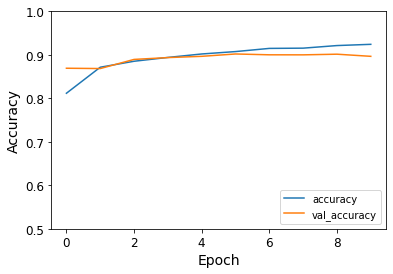

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [10]:
print(test_acc)

0.8966000080108643


90% accuracy is pretty good.

# Different Values

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (12, 12), activation='relu', input_shape=(28, 28, 1))) # was (32, (3, 3), activa..
model.add(layers.MaxPooling2D((1, 1))) #Was 2x2, now 1x1
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten()) #Flatten to 1D
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 17, 17, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 17, 17, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 5, 5, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 1600)             

Output shapes are completely different to what they were originally.

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.4579 - accuracy: 0.8350 - val_loss: 0.5069 - val_accuracy: 0.8043
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.3934 - accuracy: 0.8558 - val_loss: 0.3768 - val_accuracy: 0.8613
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.3651 - accuracy: 0.8655 - val_loss: 0.3900 - val_accuracy: 0.8612
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.3454 - accuracy: 0.8730 - val_loss: 0.3684 - val_accuracy: 0.8620
Epoch 5/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.3320 - accuracy: 0.8768 - val_loss: 0.3645 - val_accuracy: 0.8716
Epoch 6/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.3129 - accuracy: 0.8830 - val_loss: 0.3578 - val_accuracy: 0.8723
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.3096 - accuracy: 0.8848 - val_loss: 0.3364 -

313/313 - 1s - loss: 0.3921 - accuracy: 0.8603 - 1s/epoch - 4ms/step


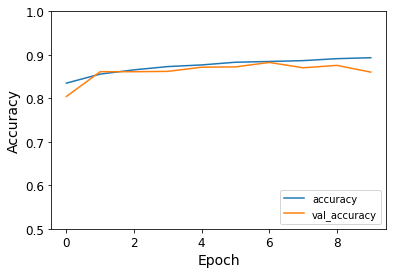

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [17]:
print(test_acc)

0.8603000044822693


Decrease from 90 to 86.

# Different Values

In [18]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1))) ## was (32, (3, 3) then (32, (12,12))
model.add(layers.MaxPooling2D((3, 3))) # was 2x2, then 1x1
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten()) #Flatten to 1D
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [19]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 6, 6, 64)          36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 1, 1, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 64)               

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.5329 - accuracy: 0.8152 - val_loss: 0.3650 - val_accuracy: 0.8702
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3646 - accuracy: 0.8660 - val_loss: 0.3318 - val_accuracy: 0.8763
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3239 - accuracy: 0.8823 - val_loss: 0.3380 - val_accuracy: 0.8747
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3006 - accuracy: 0.8892 - val_loss: 0.3067 - val_accuracy: 0.8939
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2790 - accuracy: 0.8967 - val_loss: 0.3007 - val_accuracy: 0.8968
Epoch 6/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2630 - accuracy: 0.9029 - val_loss: 0.3091 - val_accuracy: 0.8933
Epoch 7/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2514 - accuracy: 0.9069 - val_loss: 0.2945 -

313/313 - 1s - loss: 0.2873 - accuracy: 0.8988 - 1s/epoch - 3ms/step


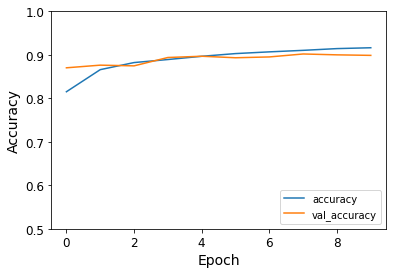

In [21]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [22]:
print(test_acc)

0.8988000154495239


Originally got 0.896, so a marginal increase here by using 64 instead of 32 on the first convolutional layer.

# Different activation function for dense layers

In [23]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) #Convolutional Layer
model.add(layers.MaxPooling2D((2, 2))) #Pooling Layer 2x2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten()) #Flatten to 1D
model.add(layers.Dense(64, activation='sigmoid')) #Sigmoid activation function
model.add(layers.Dense(10))

In [24]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 576)              

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5242 - accuracy: 0.8231 - val_loss: 0.3783 - val_accuracy: 0.8585
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3356 - accuracy: 0.8776 - val_loss: 0.3109 - val_accuracy: 0.8856
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3105 - accuracy: 0.8859 - val_loss: 0.3026 - val_accuracy: 0.8852
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2931 - accuracy: 0.8921 - val_loss: 0.3130 - val_accuracy: 0.8882
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2823 - accuracy: 0.8972 - val_loss: 0.3052 - val_accuracy: 0.8891
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2905 - accuracy: 0.8940 - val_loss: 0.2981 - val_accuracy: 0.8926
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2868 - accuracy: 0.8944 - val_loss: 0.3153 -

313/313 - 1s - loss: 0.3485 - accuracy: 0.8713 - 961ms/epoch - 3ms/step


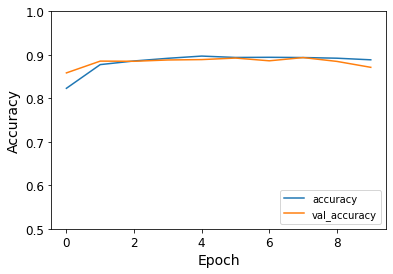

In [26]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [27]:
print(test_acc)

0.8712999820709229


Sigmoid activation function decreased the accuracy.

# Different activation function for conv and pooling layers

In [28]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28, 28, 1))) #Convolutional Layer
model.add(layers.MaxPooling2D((2, 2))) #Pooling Layer 2x2
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model.add(layers.Flatten()) #Flatten to 1D
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [29]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_5 (Flatten)         (None, 576)              

In [30]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.6480 - accuracy: 0.7553 - val_loss: 0.4386 - val_accuracy: 0.8385
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3957 - accuracy: 0.8548 - val_loss: 0.3808 - val_accuracy: 0.8573
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3362 - accuracy: 0.8769 - val_loss: 0.3058 - val_accuracy: 0.8860
Epoch 4/10
1875/1875 [==============================] - 23s 13ms/step - loss: 0.3036 - accuracy: 0.8885 - val_loss: 0.2908 - val_accuracy: 0.8919
Epoch 5/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2802 - accuracy: 0.8964 - val_loss: 0.2742 - val_accuracy: 0.8984
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2670 - accuracy: 0.9014 - val_loss: 0.2727 - val_accuracy: 0.9005
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2518 - accuracy: 0.9061 - val_loss: 0.2786 -

313/313 - 1s - loss: 0.2414 - accuracy: 0.9131 - 1s/epoch - 3ms/step


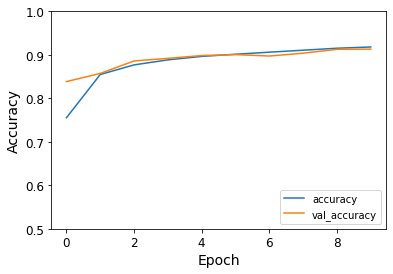

In [31]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [32]:
print(test_acc)

0.913100004196167


Sigmoid actiavtion function increased the accuracy when used on convolutional and pooling layers.